In [1]:
import numpy as np
import pandas as pd 


In [5]:
data_train=pd.read_csv('/content/drive/MyDrive/FTS-Project 1/train.csv')
data_test=pd.read_csv('/content/drive/MyDrive/FTS-Project 1/test.csv')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,0.963396,-0.140840,0.115375,-0.985250,-0.981708,-0.877625,-0.985001,-0.984416,-0.894677,0.892055,-0.161265,0.124660,0.977436,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,0.966561,-0.141551,0.109379,-0.997411,-0.989447,-0.931639,-0.997884,-0.989614,-0.933240,0.892060,-0.161343,0.122586,0.984520,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,0.966878,-0.142010,0.101884,-0.999574,-0.992866,-0.992917,-0.999635,-0.992605,-0.992934,0.892401,-0.163711,0.094566,0.986770,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.

In [8]:
data_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,"tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,0.936489,-0.282719,0.115288,-0.925427,-0.937014,-0.564288,-0.930020,-0.937822,-0.605588,0.906083,-0.279244,0.152895,0.944461,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,0.927404,-0.289215,0.152568,-0.989057,-0.983887,-0.964781,-0.989000,-0.983159,-0.965206,0.856176,-0.304870,0.152895,0.944461,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,0.929915,-0.287513,0.146086,-0.995937,-0.988251,-0.981580,-0.995976,-0.988629,-0.980255,0.856269,-0.304870,0.139454,0.948704,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.1688

In [9]:
x=data_train.drop(['Work'],axis=1)
y=data_train['Work']
#x=np.array(x)
test_x=data_test.drop(['Work'],axis=1)
test_y=data_test['Work']
#test_x=np.array(test_x)

In [10]:
classes=len(y.unique())
classes

6

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#y=le.fit_transform(y)
#test_y=le.fit_transform(test_y)

In [11]:
y=pd.get_dummies(y)


In [12]:
test_y=pd.get_dummies(test_y)
test_y

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2942,0,0,0,0,0,1
2943,0,0,0,0,0,1
2944,0,0,0,0,0,1
2945,0,0,0,0,0,1


In [13]:
y

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
7347,0,0,0,0,0,1
7348,0,0,0,0,0,1
7349,0,0,0,0,0,1
7350,0,0,0,0,0,1


In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [15]:
classifier=Sequential()
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=549))
classifier.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=15,activation='relu',kernel_initializer='he_uniform'))
classifier.add(Dropout(0.5))
classifier.add(Dense(classes,activation='softmax'))

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                8250      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 9

In [17]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9377
Epoch 2/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9425
Epoch 3/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9400
Epoch 4/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9427
Epoch 5/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9465
Epoch 6/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9431
Epoch 7/50
230/230 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9381
Epoch 8/50
230/230 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9366
Epoch 9/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9445
Epoch 10/50
230/230 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9461

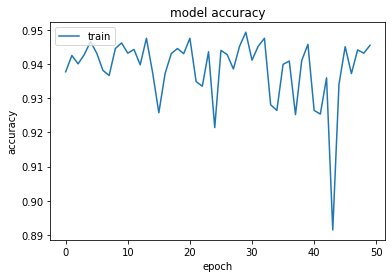

In [22]:
import matplotlib.pyplot as plt
history=classifier.fit(x, y,epochs=50)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
score = classifier.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

93/93 [==============================] - 1s 1ms/step - loss: 0.2497 - accuracy: 0.9522
Test loss: 0.2496810257434845
Test accuracy: 95.21547555923462


In [ ]:
ypred=classifier.predict(test_x)

In [ ]:

ypred

array([[1.0959733e-07, 4.4845329e-03, 9.9551469e-01, 1.5097535e-17,
        6.5616638e-07, 9.6711283e-10],
       [1.7602879e-10, 1.0443715e-02, 9.8955625e-01, 2.8209749e-29,
        5.3868195e-12, 1.1297449e-18],
       [2.5484514e-09, 9.9436089e-04, 9.9900562e-01, 1.3295914e-21,
        5.4037660e-08, 7.7030830e-12],
       ...,
       [3.5203125e-11, 1.7979202e-08, 2.0893106e-02, 4.3214412e-05,
        4.8404660e-02, 9.3065906e-01],
       [1.0116431e-10, 3.7598326e-08, 2.3056725e-02, 6.8561298e-05,
        4.6630330e-02, 9.3024427e-01],
       [7.9167428e-09, 8.4710092e-07, 3.4252681e-02, 6.5569137e-04,
        3.9134029e-02, 9.2595667e-01]], dtype=float32)

In [ ]:
import tensorflow as tf


In [ ]:
#ypred1=tf.keras.utils.to_categorical(ypred, num_classes=6, dtype='float32')
#print(ypred1)

In [ ]:
test_y

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2942,0,0,0,0,0,1
2943,0,0,0,0,0,1
2944,0,0,0,0,0,1
2945,0,0,0,0,0,1


In [ ]:
ypred

array([[1.0959733e-07, 4.4845329e-03, 9.9551469e-01, 1.5097535e-17,
        6.5616638e-07, 9.6711283e-10],
       [1.7602879e-10, 1.0443715e-02, 9.8955625e-01, 2.8209749e-29,
        5.3868195e-12, 1.1297449e-18],
       [2.5484514e-09, 9.9436089e-04, 9.9900562e-01, 1.3295914e-21,
        5.4037660e-08, 7.7030830e-12],
       ...,
       [3.5203125e-11, 1.7979202e-08, 2.0893106e-02, 4.3214412e-05,
        4.8404660e-02, 9.3065906e-01],
       [1.0116431e-10, 3.7598326e-08, 2.3056725e-02, 6.8561298e-05,
        4.6630330e-02, 9.3024427e-01],
       [7.9167428e-09, 8.4710092e-07, 3.4252681e-02, 6.5569137e-04,
        3.9134029e-02, 9.2595667e-01]], dtype=float32)